# Logistic Regression

**Logistic regression** is a supervised learning algorithm that can be used to classify data into categories, or classes, by predicting the probability that an observation falls into a particular class based on its features.

Though it can be extended to more than two categories, logistic regression is often used for binary classification, i.e. determining which of two groups a data point belongs to, or whether an event will occur or not.

The typical setup for logistic regression is as follows: there is an outcome $y$ that falls into one of two categories (say 0 or 1), and the following equation is used to estimate the probability that $y$ belongs to a particular category given inputs $X = (x_1,x_2,\dots,x_k)$

$$
P(y=1 \mid X) = \text{sigmoid}(z) = \frac{1}{1 + e^{-z}}
$$
where
$$
z = \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \dots + \hat{\beta}_k x_k
$$

The equation for $z$ likely looks familiar. This is called a linear predictor, and it is transformed by the sigmoid function so that the values fall between 0 and 1, and can therefore be interpreted as probabilities. This resulting probability is then compared to a threshold to predict a class for $y$ based on $X$.

$$
P(y=1 \mid X) = \frac{1}{1 + e^{-(\hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \dots + \hat{\beta}_k x_k)}}
$$

### How It Works

Let’s make this a bit more concrete by walking through an example. Suppose that you want to go for a hike in Seattle. You want to predict whether it will be sunny or rainy, so that you can decide whether to hike or drink coffee indoors at a local cafe. You know that it rains often in Seattle, but you’ve heard the summers have nice weather. The question is: can we predict the weather, given factors such as the temperature?

Assume there are two classes: Rainy Days and Sunny Days. We can assign a numeric value of 0 and 1 to each class, say 0 to a Rainy Day and 1 to a Sunny Day. We have one continuous feature: the temperature, in degrees Fahrenheit. For each day, we can plot this value along with the corresponding temperature.

<img src="images/weather_predict_1.png">

Clearly, we should not fit a linear regression model to these data. The outcomes of a linear regression model can take any numerical value, but these data can only take on outcomes of 0 or 1, so the predictions of a linear model may not be meaningful.

Instead, we can fit a logistic function to the data. The values of this function can be interpreted as probabilities, as the values range between 0 and 1. We can interpret the line as the probability of a sunny day given a particular temperature.

<img src="images/weather_predict_2.png" />

Now that we have the logistic function to predict the probabilities of each outcome, we can predict the class. We use a classification threshold, or decision boundary, to decide the predicted class based on the probability of each class given the feature values. A typical threshold is 0.5, where we predict an outcome will occur if the probability of that outcome is greater than 0.5. This threshold can be adjusted — for example, if you really dislike the rain, you may want to set the threshold higher to be more cautious, so that that you predict a sunny day and go hiking only if the probability of a sunny day exceeds that threshold.

<img src="images/weather_predict_3.png" />

### Evaluating Our Model

When fitting our model, the goal is to find the parameters that optimize a function that defines how well the model is performing. Put simply, the goal is to make predictions as close to 1 when the outcome is 1 and as close to 0 when the outcome is 0. In machine learning, the function to be optimized is called the loss function or cost function. We use the loss function to determine how well our model fits the data.


A suitable loss function in logistic regression is called the Log-Loss, or binary cross-entropy. This function is:

$$
\text{Log-Loss} = \sum_{i=0}^{n} - \left( y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right)
$$

where $n$ is the number of samples, indexed by $i$, $y_i$ is the true class for the index $i$, and $p_i$ is the model prediction for the index $i$. Minimizing the $\text{Log-Loss}$ is equivalent to maximizing the Log-Likelihood, since the $\text{Log-Loss}$ is the negative of the Log-Likelihood.

### Estimating Coefficients

How do we find the coefficients $ (\hat{\beta}_0, \hat{\beta}_1, \dots, \hat{\beta}_k) $ that minimize the loss function? There are two main approaches for logistic regression: gradient descent and maximum likelihood estimation. We’ll briefly discuss both here.

#### Gradient Descent

A common way to estimate coefficients is to use gradient descent. In gradient descent, the goal is to minimize the Log-Loss cost function over all samples. This method involves selecting initial parameter values, and then updating them incrementally by moving them in the direction that decreases the loss. At each iteration, the parameter value is updated by the gradient, scaled by the step size (otherwise known as the learning rate). The gradient is the vector encompassing the direction and rate of the fastest increase of a function, which can be calculated using partial derivatives. The parameters are updated in the opposite direction of the gradient by the step size in an attempt to find the parameter values that minimize the Log-Loss.

Because the gradient calculates where the function is increasing, going in the opposite direction leads us to the minimum of our function. In this manner, we can repeatedly update our model's coefficients such that we eventually reach the minimum of our error function and obtain a sigmoid curve that fits our data well.

#### Maximum Likelihood Estimation

Another approach is finding the model that maximizes the likelihood of observing the data by using Maximum Likelihood Estimation (MLE). It turns out, minimizing the Log-Loss is equivalent to maximizing the Log-Likelihood. Therefore, the goal is to find the parameter values that maximize the following:

$$
\text{Log-Likelihood} = \sum_{i=0}^{n} \left( y_i \cdot \log(p_i) + (1 - y_i) \cdot \log(1 - p_i) \right)
$$

We can do so by differentiating the Log-Likelihood with respect to the parameters, setting the derivatives equal to 0, and solving the equation to find the estimates of the parameters.

## Model building in Scikit-learn

Let's build the diabetes prediction model using a logistic regression classifier.

Let's first load the required **Pima Indian Diabetes** dataset using the pandas' read CSV function. You can download data from the following link:
<a src="https://www.kaggle.com/uciml/pima-indians-diabetes-database">https://www.kaggle.com/uciml/pima-indians-diabetes-database</a>

In [21]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("data/pima-indians-diabetes.csv")
pima.columns = col_names

In [22]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Selecting features
Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [23]:
X = pima.drop(columns=['label'])
y = pima.label

### Splitting data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.

### Model development and prediction
First, import the LogisticRegression module and create a logistic regression classifier object using the `LogisticRegression()` function with random_state for reproducibility.

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`. 

In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=16)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

### Model Evaluation using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental part of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [29]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 25,  42]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 116 and 42 are actual predictions, and 25 and 9 are incorrect predictions.

### Visualizing confusion matrix using a heatmap

Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

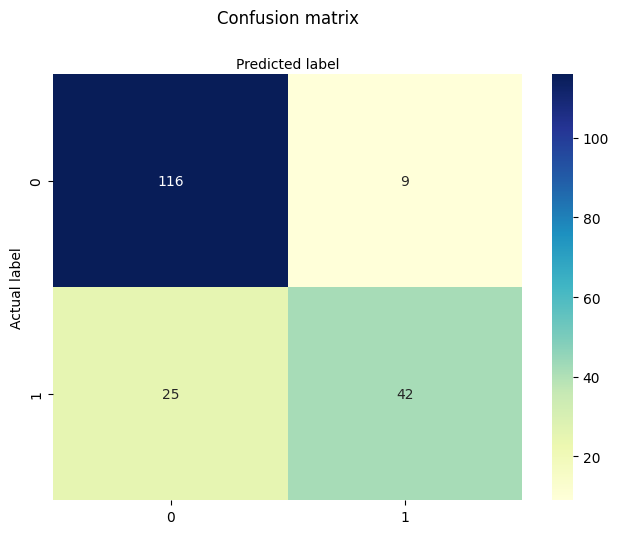

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()

### Confusion matrix evaluation metrics
Let's evaluate the model using classification_report for accuracy, precision, and recall.

In [32]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

# TODO: Write description about metrics

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



### Resources for this content:

<a href="https://mlu-explain.github.io/logistic-regression/">Logistic Regression for Classification</a>

<a href="https://www.datacamp.com/tutorial/understanding-logistic-regression-python">
Understanding Logistic Regression in Python</a>